In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import copy

In [2]:
#importing data
data = pd.read_csv("Modeling Data.csv")
data

,Unnamed: 0,Confirmed Cases,Count,Date,PRCP,SNOW,TMAX,TMIN,Year,humidity,season,season code,windspeed
0,0,0,162.500000,2015-07-01,0.00,0.0,71.0,53.0,2015,58.944444,summer,2,5.944444
1,1,0,134.458333,2015-07-02,0.00,0.0,72.0,46.0,2015,59.611111,summer,2,6.666667
2,2,0,138.041667,2015-07-03,0.00,0.0,77.0,49.0,2015,58.529412,summer,2,2.588235
3,3,0,142.791667,2015-07-04,0.00,0.0,82.0,56.0,2015,61.000000,summer,2,2.555556
4,4,0,136.625000,2015-07-05,0.00,0.0,83.0,61.0,2015,61.294118,summer,2,9.058824
5,5,0,64.458333,2015-07-06,0.77,0.0,80.0,62.0,2015,83.542857,summer,2,7.971429
6,6,0,123.916667,2015-07-07,0.00,0.0,71.0,56.0,2015,72.064516,summer,2,9.612903
7,7,0,136.041667,2015-07-08,0.00,0.0,70.0,51.0,2015,63.470588,summer,2,4.529412
8,8,0,150.458333,2015-07-09,0.00,0.0,79.0,53.0,2015,60.705882,summer,2,1.823529
9,9,0,151.583333,2015-07-10,0.00,0.0,82.0,56.0,2015,58.117647,summer,2,3.294118


In [3]:
data["DATE"] = pd.to_datetime(data["Date"])
data = data.drop(columns = ['Date', 'Unnamed: 0'])
data

,Confirmed Cases,Count,PRCP,SNOW,TMAX,TMIN,Year,humidity,season,season code,windspeed,DATE
0,0,162.500000,0.00,0.0,71.0,53.0,2015,58.944444,summer,2,5.944444,2015-07-01
1,0,134.458333,0.00,0.0,72.0,46.0,2015,59.611111,summer,2,6.666667,2015-07-02
2,0,138.041667,0.00,0.0,77.0,49.0,2015,58.529412,summer,2,2.588235,2015-07-03
3,0,142.791667,0.00,0.0,82.0,56.0,2015,61.000000,summer,2,2.555556,2015-07-04
4,0,136.625000,0.00,0.0,83.0,61.0,2015,61.294118,summer,2,9.058824,2015-07-05
5,0,64.458333,0.77,0.0,80.0,62.0,2015,83.542857,summer,2,7.971429,2015-07-06
6,0,123.916667,0.00,0.0,71.0,56.0,2015,72.064516,summer,2,9.612903,2015-07-07
7,0,136.041667,0.00,0.0,70.0,51.0,2015,63.470588,summer,2,4.529412,2015-07-08
8,0,150.458333,0.00,0.0,79.0,53.0,2015,60.705882,summer,2,1.823529,2015-07-09
9,0,151.583333,0.00,0.0,82.0,56.0,2015,58.117647,summer,2,3.294118,2015-07-10


In [4]:
#multiple regression model
features = ['TMAX', 'TMIN', 'PRCP', 'SNOW', 'season code', 'Confirmed Cases', 'windspeed', 'humidity']
train = data[data['Year']< 2018]
test = data[data['Year']>= 2018]
X_train = train[features]
y_train = train['Count']
X_test = test[features]
y_test = test['Count']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 414.47
Coefficient of determination: 0.81


In [5]:
data2015 = data[data['Year'] == 2015]
data2016 = data[data['Year'] == 2016]
data2017 = data[data['Year'] == 2017]
data2018 = data[data['Year'] == 2018]
data2019 = data[data['Year'] == 2019]
data2020 = data[data['Year'] == 2020]

In [6]:
X_test = data2019[features]
y_test = data2019['Count']
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 375.33
Coefficient of determination: 0.83


In [7]:
model_2019 = copy.copy(data2019).reset_index()
model_2019['MRpred'] = y_pred

In [8]:
X_test = data2018[features]
y_test = data2018['Count']
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 350.06
Coefficient of determination: 0.83


In [9]:
model_2018 = copy.copy(data2018).reset_index()
model_2018['MRpred'] = y_pred
#model_2019.sample(10)
#model_2019.sample(10)

In [10]:
X_test = data2020[features]
y_test = data2020['Count']
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 615.12
Coefficient of determination: 0.73


In [11]:
model_2020 = copy.copy(data2020).reset_index()
model_2020['MRpred'] = y_pred

Text(0.5,0,'Month')

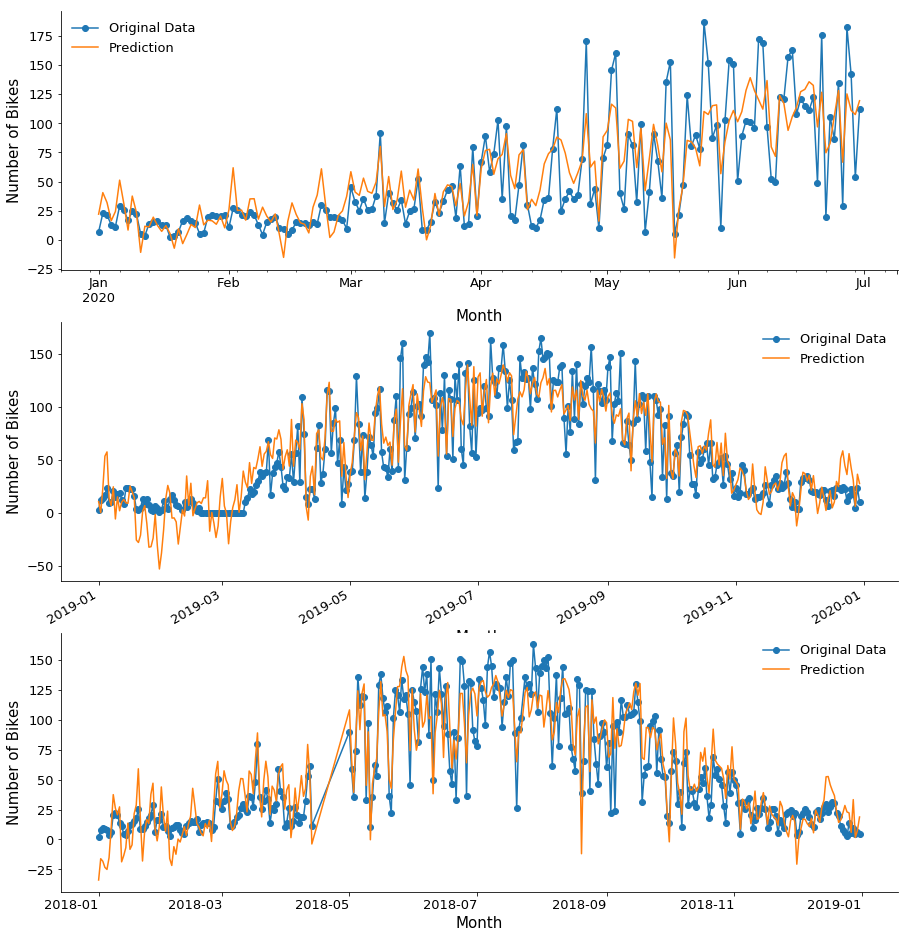

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,18))
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
model_2020.plot.line(x = 'DATE', y = 'Count', ax=ax1, grid = False, label = 'Original Data', marker = 'o')
model_2020.plot.line(x = 'DATE', y = 'MRpred', ax=ax1, grid = False, label = 'Prediction')
ax1.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax1.legend(frameon=False, loc = 'best', fontsize = 13)
ax1.set_ylabel('Number of Bikes', fontsize = 15)
ax1.set_xlabel('Month', fontsize = 15)


ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
model_2019.plot.line(x = 'DATE', y = 'Count', ax=ax2, grid = False, label = 'Original Data', marker = 'o')
model_2019.plot.line(x = 'DATE', y = 'MRpred', ax=ax2, grid = False, label = 'Prediction')
ax2.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax2.legend(frameon=False, loc = 'best', fontsize = 13)
ax2.set_ylabel('Number of Bikes', fontsize = 15)
ax2.set_xlabel('Month', fontsize = 15)


model_2018.plot.line(x = 'DATE', y = 'Count', ax=ax3, grid = False, label = 'Original Data', marker = 'o')
model_2018.plot.line(x = 'DATE', y = 'MRpred', ax=ax3, grid = False, label = 'Prediction')
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax3.legend(frameon=False, loc = 'best', fontsize = 13)
ax3.set_ylabel('Number of Bikes', fontsize = 15)
ax3.set_xlabel('Month', fontsize = 15)

In [61]:
#Polynomial Ridge Regression
features = ['TMAX', 'TMIN', 'PRCP', 'SNOW', 'season code', 'Confirmed Cases', 'windspeed', 'humidity']
train = data[data['Year']< 2018]
test = data[data['Year']>= 2018]
X_train = train[features]
y_train = train['Count']
X_test = test[features]
y_test = test['Count']

degree=2
poly = PolynomialFeatures(degree = degree, include_bias = False)
ridge = linear_model.Ridge()
#X_poly = poly.fit_transform(X_train)
#poly.fit(X_train, y_train)
pipe = Pipeline([('poly', poly), ('ridge', ridge)])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))


# Make predictions using the testing set
y_pred = pipe.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

0.8554214234905393
Mean squared error: 314.76
Coefficient of determination: 0.86


In [62]:
def poly_ridge(x):
    X_test = x[features]
    y_test = x['Count']
    y_pred = pipe.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
    model = copy.copy(x).reset_index()
    model['PRpred'] = pd.Series(y_pred)
    return model

In [72]:
def multi_regression(x):
    X_test = x[features]
    y_test = x['Count']
    y_pred = regr.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
    model = copy.copy(x).reset_index()
    model['MRpred'] = pd.Series(y_pred)
    return model

In [63]:
model_2018 = poly_ridge(data2018)
model_2019 = poly_ridge(data2019)
model_2020 = poly_ridge(data2020)

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 254.63
Coefficient of determination: 0.88
Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 264.03
Coefficient of determination: 0.88
Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 530.29
Coefficient of determination: 0.76


Text(0.5,0,'Month')

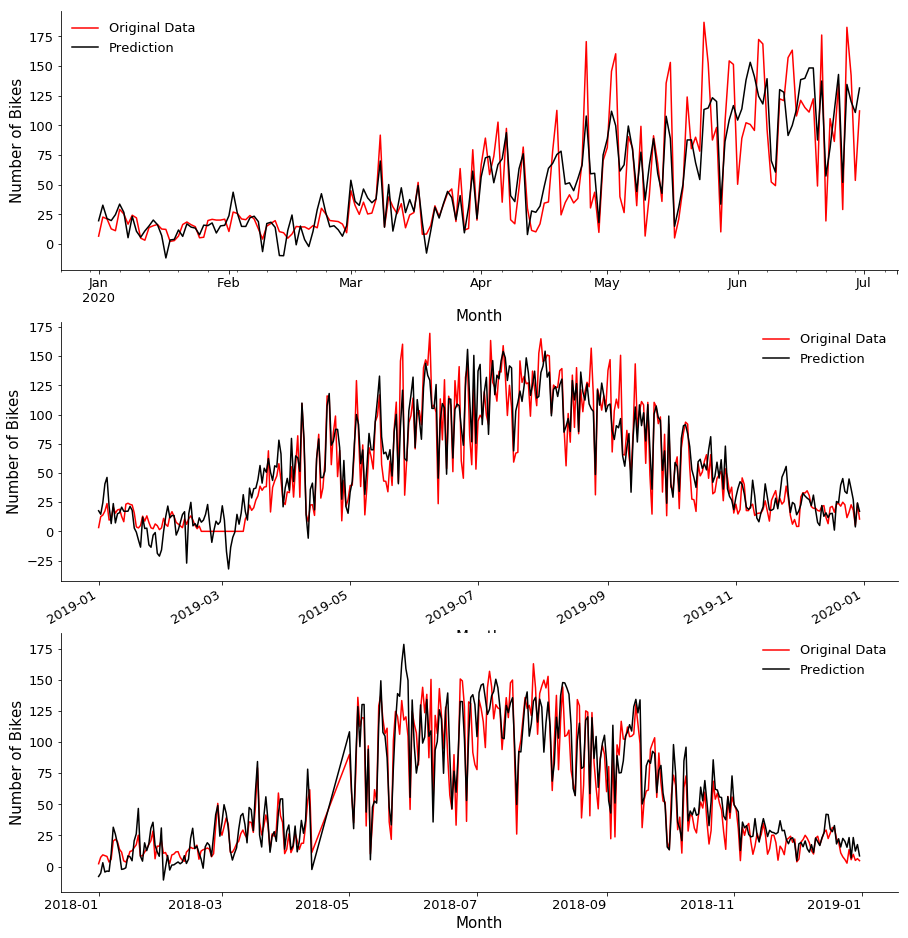

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,18))
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
model_2020.plot.line(x = 'DATE', y = 'Count', ax=ax1, grid = False, label = 'Original Data', color='red')
model_2020.plot.line(x = 'DATE', y = 'PRpred', ax=ax1, grid = False, label = 'Prediction', color='black')
ax1.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax1.legend(frameon=False, loc = 'best', fontsize = 13)
ax1.set_ylabel('Number of Bikes', fontsize = 15)
ax1.set_xlabel('Month', fontsize = 15)


ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
model_2019.plot.line(x = 'DATE', y = 'Count', ax=ax2, grid = False, label = 'Original Data', color='red')
model_2019.plot.line(x = 'DATE', y = 'PRpred', ax=ax2, grid = False, label = 'Prediction', color='black')
ax2.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax2.legend(frameon=False, loc = 'best', fontsize = 13)
ax2.set_ylabel('Number of Bikes', fontsize = 15)
ax2.set_xlabel('Month', fontsize = 15)


model_2018.plot.line(x = 'DATE', y = 'Count', ax=ax3, grid = False, label = 'Original Data', color='red')
model_2018.plot.line(x = 'DATE', y = 'PRpred', ax=ax3, grid = False, label = 'Prediction', color='black')
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax3.legend(frameon=False, loc = 'best', fontsize = 13)
ax3.set_ylabel('Number of Bikes', fontsize = 15)
ax3.set_xlabel('Month', fontsize = 15)

In [70]:
#Polynomial Ridge Regression
features = ['TMAX', 'TMIN', 'PRCP', 'SNOW', 'season code', 'Confirmed Cases', 'windspeed', 'humidity']
train = data[data['Year']>= 2018]
test = data[data['Year']< 2018]
X_train = train[features]
y_train = train['Count']
X_test = test[features]
y_test = test['Count']

degree=2
poly = PolynomialFeatures(degree = degree,  include_bias = False)
ridge = linear_model.Ridge()
#X_poly = poly.fit_transform(X_train)
#poly.fit(X_train, y_train)
pipe = Pipeline([('poly', poly), ('ridge', ridge)])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))


# Make predictions using the testing set
y_pred = pipe.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

0.8670427181648426
Mean squared error: 283.53
Coefficient of determination: 0.87


In [18]:
model_2015 = poly_ridge(data2015)
model_2016 = poly_ridge(data2016)
model_2017 = poly_ridge(data2017)

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 315.75
Coefficient of determination: 0.84
Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 256.31
Coefficient of determination: 0.88
Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 294.56
Coefficient of determination: 0.86


Text(0.5,0,'Month')

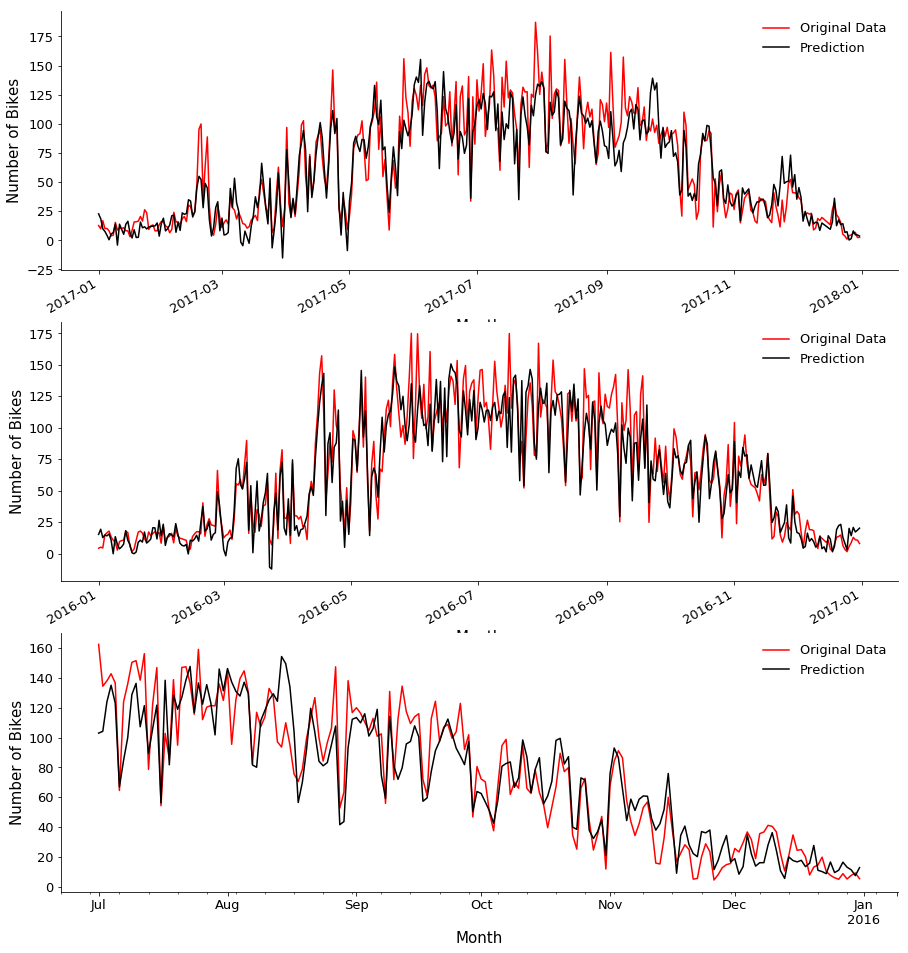

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,18))
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
model_2017.plot.line(x = 'DATE', y = 'Count', ax=ax1, grid = False, label = 'Original Data', color='red')
model_2017.plot.line(x = 'DATE', y = 'PRpred', ax=ax1, grid = False, label = 'Prediction', color='black')
ax1.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax1.legend(frameon=False, loc = 'best', fontsize = 13)
ax1.set_ylabel('Number of Bikes', fontsize = 15)
ax1.set_xlabel('Month', fontsize = 15)


ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
model_2016.plot.line(x = 'DATE', y = 'Count', ax=ax2, grid = False, label = 'Original Data', color='red')
model_2016.plot.line(x = 'DATE', y = 'PRpred', ax=ax2, grid = False, label = 'Prediction', color='black')
ax2.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax2.legend(frameon=False, loc = 'best', fontsize = 13)
ax2.set_ylabel('Number of Bikes', fontsize = 15)
ax2.set_xlabel('Month', fontsize = 15)


model_2015.plot.line(x = 'DATE', y = 'Count', ax=ax3, grid = False, label = 'Original Data', color='red')
model_2015.plot.line(x = 'DATE', y = 'PRpred', ax=ax3, grid = False, label = 'Prediction', color='black')
ax3.tick_params(axis='both', which='major', labelsize=13)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend(loc = 'upper left')
plt.xticks(rotation='0')
ax3.legend(frameon=False, loc = 'best', fontsize = 13)
ax3.set_ylabel('Number of Bikes', fontsize = 15)
ax3.set_xlabel('Month', fontsize = 15)

# Predicting for 2021

In [45]:
#Assume 2021 weather will be similar to 2017
pred_2021 = copy.copy(data2017).reset_index()
pred_2021

,index,Confirmed Cases,Count,PRCP,SNOW,TMAX,TMIN,Year,humidity,season,season code,windspeed,DATE
0,548,0,12.708333,0.00,0.0,36.0,17.0,2017,70.823529,winter,4,5.705882,2017-01-01
1,549,0,9.916667,0.00,0.0,38.0,23.0,2017,87.000000,winter,4,6.916667,2017-01-02
2,550,0,16.833333,0.03,0.0,34.0,10.0,2017,89.562500,winter,4,9.593750,2017-01-03
3,551,0,10.125000,0.00,0.0,11.0,2.0,2017,67.300000,winter,4,11.600000,2017-01-04
4,552,0,10.208333,0.00,0.1,7.0,-2.0,2017,64.086957,winter,4,8.956522,2017-01-05
5,553,0,8.125000,0.00,0.0,4.0,-5.0,2017,65.058824,winter,4,6.000000,2017-01-06
6,554,0,3.833333,0.00,0.0,13.0,-3.0,2017,61.882353,winter,4,7.176471,2017-01-07
7,555,0,4.458333,0.00,0.0,17.0,-3.0,2017,59.941176,winter,4,8.294118,2017-01-08
8,556,0,15.416667,0.03,0.9,29.0,17.0,2017,77.296296,winter,4,10.111111,2017-01-09
9,557,0,8.791667,0.58,0.0,43.0,16.0,2017,87.958333,winter,4,13.375000,2017-01-10


In [26]:
model_2020['Confirmed Cases'].max()

150

In [78]:
cases2021 = []
cases = 0
for x in range(len(pred_2021.index)):
    cases = round(50 - 0.2*x)
    #cases = 0
    if cases < 0:
        cases = 0
    cases2021.append(cases)
pred_2021['Confirmed Cases'] = pd.Series(cases2021)
pred_2021

,index,Confirmed Cases,Count,PRCP,SNOW,TMAX,TMIN,Year,humidity,season,season code,windspeed,DATE
0,548,50,12.708333,0.00,0.0,36.0,17.0,2017,70.823529,winter,4,5.705882,2017-01-01
1,549,50,9.916667,0.00,0.0,38.0,23.0,2017,87.000000,winter,4,6.916667,2017-01-02
2,550,50,16.833333,0.03,0.0,34.0,10.0,2017,89.562500,winter,4,9.593750,2017-01-03
3,551,49,10.125000,0.00,0.0,11.0,2.0,2017,67.300000,winter,4,11.600000,2017-01-04
4,552,49,10.208333,0.00,0.1,7.0,-2.0,2017,64.086957,winter,4,8.956522,2017-01-05
5,553,49,8.125000,0.00,0.0,4.0,-5.0,2017,65.058824,winter,4,6.000000,2017-01-06
6,554,49,3.833333,0.00,0.0,13.0,-3.0,2017,61.882353,winter,4,7.176471,2017-01-07
7,555,49,4.458333,0.00,0.0,17.0,-3.0,2017,59.941176,winter,4,8.294118,2017-01-08
8,556,48,15.416667,0.03,0.9,29.0,17.0,2017,77.296296,winter,4,10.111111,2017-01-09
9,557,48,8.791667,0.58,0.0,43.0,16.0,2017,87.958333,winter,4,13.375000,2017-01-10


In [82]:
model_2021a = poly_ridge(pred_2021)
#model_2021a = multi_regression(pred_2021)

Coefficients: 
 [ 1.73182098e+00  1.49840557e-01 -1.98201151e+01  5.88547231e+00
  2.67022142e-01  3.55271368e-15 -1.89589756e+00 -7.62269840e-01]
Mean squared error: 1211.96
Coefficient of determination: 0.42


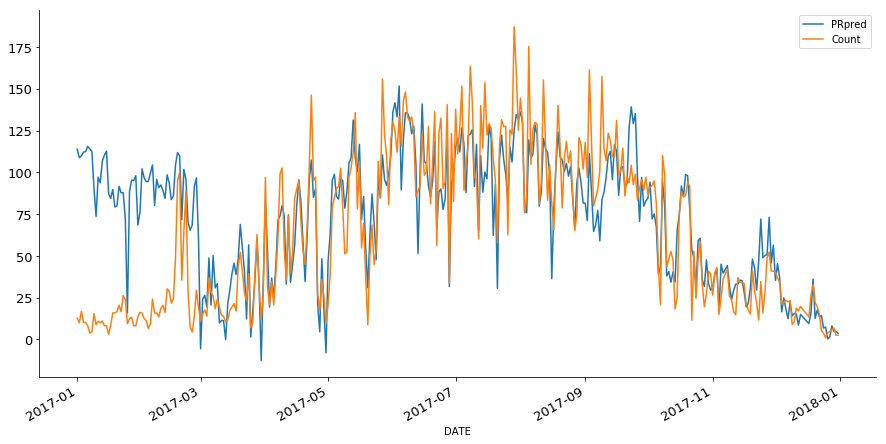

In [83]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax.tick_params(axis='both', which='major', labelsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
model_2021a.plot(x = 'DATE', y = 'PRpred', ax = ax)
model_2021a.plot(x = 'DATE', y = 'Count', ax = ax)

In [84]:
model_2021a

,level_0,index,Confirmed Cases,Count,PRCP,SNOW,TMAX,TMIN,Year,humidity,season,season code,windspeed,DATE,PRpred
0,0,548,50,12.708333,0.00,0.0,36.0,17.0,2017,70.823529,winter,4,5.705882,2017-01-01,113.826953
1,1,549,50,9.916667,0.00,0.0,38.0,23.0,2017,87.000000,winter,4,6.916667,2017-01-02,108.659183
2,2,550,50,16.833333,0.03,0.0,34.0,10.0,2017,89.562500,winter,4,9.593750,2017-01-03,109.894108
3,3,551,49,10.125000,0.00,0.0,11.0,2.0,2017,67.300000,winter,4,11.600000,2017-01-04,112.023235
4,4,552,49,10.208333,0.00,0.1,7.0,-2.0,2017,64.086957,winter,4,8.956522,2017-01-05,112.440910
5,5,553,49,8.125000,0.00,0.0,4.0,-5.0,2017,65.058824,winter,4,6.000000,2017-01-06,115.533346
6,6,554,49,3.833333,0.00,0.0,13.0,-3.0,2017,61.882353,winter,4,7.176471,2017-01-07,114.079085
7,7,555,49,4.458333,0.00,0.0,17.0,-3.0,2017,59.941176,winter,4,8.294118,2017-01-08,112.509703
8,8,556,48,15.416667,0.03,0.9,29.0,17.0,2017,77.296296,winter,4,10.111111,2017-01-09,90.660715
9,9,557,48,8.791667,0.58,0.0,43.0,16.0,2017,87.958333,winter,4,13.375000,2017-01-10,73.628009
